# Portfolio Prüfung WWI2023B
Bitte bearbeiten Sie alle Aufgaben direkt  hier im Notebook und geben Sie die .ipynb-Datei am Ende der Portfolio-Prüfung [hier](https://privacy.dhbw-stuttgart.de/wwi2022b.html) ab.
Für Aufgaben die ohne Code erstellt werden, steht nach der Aufgabenstellung ein Markdown Antwortfeld zur Verfügung. 
Für Aufgaben bei denen ein Code verlangt wird, befindet sich nach der Aufgabenstellung ein interaktives Code-Feld (ggf. mit schon vorab ausgefüllten Code-Fragementen).

Viel Erfolg 

## Aufgabe 1 Python Basics

Ersetzen Sie die Fragezeichen im unten stehenden Code so, dass der Befehl `print(squared)` die Ausgabe `[1, 4, 9, 16, 25]` erzeugt. Verwenden Sie zur Erzeugung der Quadratzahlen die Variable `numbers`. Eine direkte Zuweisung von [1,4,6,9,16] an `squared` ist nicht erlaubt.

In [1]:
numbers = [1, 2, 3, 4, 5]
squared = [numbers**2]
print(squared)


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

<div style="text-align: right"> (___ / 2 Punkte) </div>

Ersetzen Sie die Fragezeichen im unten stehenden Code so, dass die Ausgabe der Code-Zeile `Hlo` lautet.

In [39]:
my_string = 'Hello WWI'
print(my_string[0:6:2])

Hlo


<div style="text-align: right"> (___ / 2 Punkte) </div>

Gegeben ist das unten stehende Python-Dictionary. Ergänzen Sie die Funktion `calculate_average_grade()`, welche die Durchschnittsnote jedes Studenten zurückgibt. Die Funktion `calculate_average_grade(student_grades)` sollte ein Dictionary `av_grades` zurückgeben, in dem die Schlüssel die Namen der Schüler sind und die Werte ihre Durchschnittsnote.

In [40]:
student_grades = {
    'Alice': [85, 90, 92],
    'Bob': [70, 80, 75],
    'Charlie': [95, 85, 90]
}

def calculate_average_grade(list_of_grades):
    av_grades = {}
    for student in list_of_grades:
        total = 0
        num = 0
        for grade in list_of_grades[student]:
            num += 1
            total += grade
        av_grades[student] = total / num

    return av_grades     

print(calculate_average_grade(student_grades)) # Ausgabe: {'Alice': 89.0, 'Bob': 75.0, 'Charlie': 90.0}

{'Alice': 89.0, 'Bob': 75.0, 'Charlie': 90.0}


<div style="text-align: right"> (___ / 5 Punkte) </div>

Schreiben Sie eine Python-Funktion namens `sum_of_digits`, die die Summe der Ziffern (die Quersumme) einer gegebenen Zahl berechnet.

Beispielausgaben:

  `sum_of_digits(123)`: 1 + 2 + 3 = 6
  
  `sum_of_digits(456)`: 4 + 5 + 6 = 15

In [41]:
def sum_of_digits(digits):
    
    sum = 0
    for digit in str(digits):
        sum += int(digit)
    return sum

print(sum_of_digits(123))
print(sum_of_digits(456))

6
15


<div style="text-align: right"> (___ / 4 Punkte) </div>


# Aufgabe 2 Komplexität von Algorithmen
Definieren Sie die Funktionen `funktion1, funktion2, funktion3` so dass sie die angegeebene Komplexität besitzen. Es soll gelten:
| Funktion     | Aufwand |
|--------------|---------|
| funktion1    | $O(n)$    |
| funktion2    | $O(n^2)$    |
| funktion3    | $O(log(n))$    |

In [42]:
def funktion1(n):
    for i in range(n):
        res = i
    return res

def funktion2(n):
    for i in range(n*n):
        res = i
    return res
        

def funktion3(n):
    while n > 1:
        n = n // 2
    return n
    

<div style="text-align: right"> (___ / 9 Punkte) </div>


Sie können sich den Aufwand der von Ihnen definierten Funktionen (falls sie korrekt codiert sind) mit der folgenden Code-Zelle visualisieren lassen.

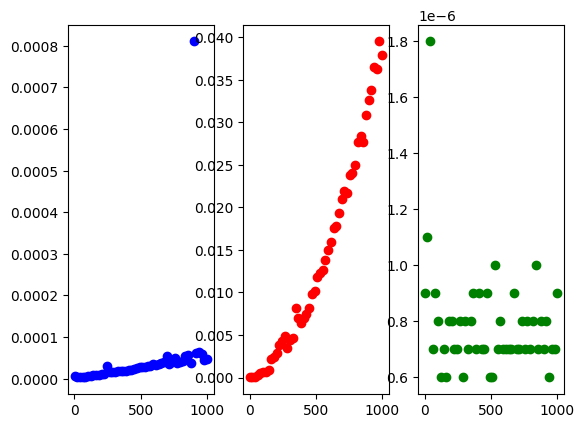

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

ns = np.linspace(1, 1000, 50, dtype=int)

ts1 = [timeit.timeit(stmt=f'funktion1({n})', 
                     #setup= f'',
                     globals=globals(), 
                     number=3)
       for n in ns]

ts2 = [timeit.timeit(stmt=f'funktion2({n})', 
                     #setup= f'',
                     globals=globals(), 
                     number=3)
       for n in ns]

ts3 = [timeit.timeit(stmt=f'funktion3({n})', 
                     #setup= f'',
                     globals=globals(), 
                     number=3)
       for n in ns]

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.plot(ns, ts1, 'ob')
ax2.plot(ns,ts2,'or')
ax3.plot(ns,ts3,'og')

# Aufgabe 3 Array-List
Gegeben ist der folgende Code für eine array-backed-list:

In [44]:
# Array Backed List
import numpy as np
class ArrayList:
    def __init__(self):
        self.data = np.empty(1, dtype=object)
        self.size = 0

    def append(self, value):
        if self.size == len(self.data): 
            ndata = np.empty(len(self.data)*2, dtype=object) 
            for i in range(len(self.data)): 
                ndata[i] = self.data[i]
            self.data = ndata             
        self.data[self.size] = value
        self.size += 1   

    def __setitem__(self,idx,value):
        """Implements `x = self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        self.data[idx] = value      

    def __len__(self):
        """Should return the number of elements in the ArrayList"""
        return self.size

    def __repr__(self):
        return str(self.data[:self.size])

## a) Zugriff
Vervollständigen Sie die Definition und ergänzen Sie die Funktion `__getitem__(self, idx)` welche das Element an einem bestimmten Index zurückliefert. 

In [45]:
class ArrayList(ArrayList):
    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        return self.data[idx]   
        

Sie können ihre Funktion mit folgendem Code testen:

In [46]:
my_list = ArrayList()
for i in range(50):
    my_list.append(i)

print(my_list[0])  # Erwartete Ausgabe: 0
print(my_list[11])  # Erwartete Ausgabe: 11
print(my_list[-1]) # Erwartete Ausgabe: 49


0
11
49


<div style="text-align: right"> (___ / 5 Punkte) </div>


## b) Löschen
Implementieren Sie eine Methode `remove(item)` für die obige ArrayList-Klasse. Diese Methode soll ein Element aus der ArrayList entfernen, falls es vorhanden ist.

Die Methode soll wie folgt funktionieren:
- Wenn das angegebene Element `item` in der ArrayList enthalten ist, sollen **alle** Vorkommen des Elements aus der Liste entfernt werden.
- Wenn das Element nicht vorhanden ist, soll die Methode keine Änderungen an der ArrayList vornehmen.


In [47]:
class ArrayList(ArrayList):
    def remove(self, item):
        """Removes all occurrences of the specified value from the ArrayList"""
        new_data = np.empty(len(self.data), dtype=object)
        new_size = 0
        for i in range(self.size):
            if self.data[i] != item:
                new_data[new_size] = self.data[i]
                new_size += 1

        self.data = new_data
        self.size = new_size

Sie können Ihre Methode mit folgendem Code testen:

In [48]:
my_list = ArrayList()
my_list.append(10)
my_list.append(20)
my_list.append(30)
my_list.append(20)
print(my_list)  # Ausgabe: [10, 20, 30, 20]

my_list.remove(10)
print(my_list)  # Ausgabe: [20, 30, 20]

my_list.remove(20)
print(my_list)  # Ausgabe: [30]

my_list.remove(50) # Keine Änderung, da 50 nicht in der Liste enthalten ist
print(my_list)  # Ausgabe: [30]

[10 20 30 20]
[20 30 20]
[30]
[30]


<div style="text-align: right"> (___ / 10 Punkte) </div>


## c) Suchen in der Liste
Implementieren Sie eine Methode `contains(value)` für die obige ArrayList. Diese Methode soll überprüfen, ob die ArrayList das angegebene Element `value` enthält.

Die Methode soll wie folgt funktionieren:
- Rückgabe `True`, wenn die ArrayList das angegebene Element `value` enthält.
- Rückgabe `False`, wenn die ArrayList das angegebene Element `value` nicht enthält.

In [49]:
class ArrayList(ArrayList):
    def contains(self, value):
        """Checks if the ArrayList contains the specified value"""
        for element in self.data:
            if element == value:
                return True
        else:
            return False

Sie können Ihre Methode mit folgendem Code testen:

In [50]:
my_list = ArrayList()
my_list.append(10)
my_list.append(20)
my_list.append(30)
print(my_list.contains(20)) # Ausgabe: True
print(my_list.contains(40)) # Ausgabe: False

True
False


<div style="text-align: right"> (___ / 6 Punkte) </div>


# Aufgabe 4 Linked List
Gegeben ist der unten stehende Code für eine Linked List.

In [2]:
class LinkedList:
    class Node:
        def __init__(self, val, next):
            self.val = val
            self.next = next

    def __init__(self):
        self.top = None
        self.size = 0  
         
    def prepend(self, value):
        newNode = LinkedList.Node(value,self.top)
        self.top = newNode
        self.size += 1

    def __iter__(self):
        node = self.top
        while node:
            yield(node.val)
            node = node.next
          
    def __repr__(self):
        return '[' + ', '.join(str(x) for x in self) + ']'
        
        

# a) Definition vervollständigen
Der Liste fehlt noch die Methoden `__len__()` und `append()`. Implementieren Sie die `__len__`-Methode, welche die Anzahl an Elementen in der Liste zurück gibt. Erweitern Sie die `append(value)`-Methode so, dass sie ein Element mit dem Wert `value` ans Ende der Liste hängt.

In [3]:
class LinkedList(LinkedList):
    def __len__(self):
        return self.size

    def append(self, value):
        if self.top:
            current = self.top       
            while (current.next):
                current = current.next
            new_node = LinkedList.Node(value, None)
            current.next = new_node
        else:
            self.top = LinkedList.Node(value, None)



Sie können Ihre Methoden mit folgenden Code testen:

In [53]:
my_linked_list = LinkedList()
my_linked_list.append(10)
print(my_linked_list) # Ausgabe [10]
my_linked_list.append(20)
print(my_linked_list) # Ausgabe [10, 20]
my_linked_list.append(30)
print(my_linked_list) # Ausgabe [10, 20, 30]

[10]
[10, 20]
[10, 20, 30]


<div style="text-align: right"> (___ / 8 Punkte) </div>


# b) Stack
Die obige Klasse LinkedList enthält bereits einige grundlegende Methoden. Ihre Aufgabe ist es, diese Klasse in einen Stack umzuwandeln, indem Sie die Methoden push, pop und peek implementieren.
- Implementieren Sie die Methode push(value), die ein neues Element mit dem angegebenen Wert oben auf den Stack legt.
- Implementieren Sie die Methode pop(), die den Wert des obersten Elements vom Stack entfernt und zurück gibt.
- Implementieren Sie die Methode peek(), die den Wert des obersten Elements auf dem Stack zurück gibt, ohne es zu entfernen.

In [4]:
class Stack(LinkedList):

    def push(self, value):
        self.size +=1
        self.prepend(value)
        

    def pop(self):
        ret_value = self.top.val
        self.top = self.top.next
        self.size -= 1
        return ret_value

    def peek(self):
        return self.top.val
        

Sie können Ihre Methoden mit folgenden Code testen:

In [55]:
my_stack = Stack()
my_stack.push(10)
my_stack.push(20)
my_stack.push(30)

print(my_stack) # Ausgabe [30, 20, 10]
print(my_stack.peek())  # Ausgabe: 30
print(my_stack.pop())   # Ausgabe: 30
print(my_stack.pop())   # Ausgabe: 20
print(my_stack.peek())  # Ausgabe: 10

[30, 20, 10]
30
30
20
10


<div style="text-align: right"> (___ / 9 Punkte) </div>


# c) Liste sortieren
Implementieren Sie eine Funktion `sort()`, welche die Elemente der LinkedList nach ihrer Größe sortiert. Das kleinste Element sollte an erster Stelle stehen, und das größte Element sollte an letzter Stelle stehen.

In [56]:
class LinkedList(LinkedList):

    def sort(self):
        if not self.top:
            return

        sorted_top = None
        current = self.top

        while current:
            next_node = current.next
            sorted_top = self.insert_sorted(sorted_top, current)
            current = next_node

        self.top = sorted_top

    def insert_sorted(self, sorted_top, new_node):
        new_node.next = None 
        if not sorted_top or new_node.val <= sorted_top.val:
            new_node.next = sorted_top
            return new_node

        current = sorted_top
        while current.next and current.next.val < new_node.val:
            current = current.next

        new_node.next = current.next
        current.next = new_node

        return sorted_top

Sie können Ihre Methoden mit folgenden Code testen:

In [57]:
my_unsorted_list = LinkedList()
my_unsorted_list.prepend(10)
my_unsorted_list.prepend(5)
my_unsorted_list.prepend(20)
my_unsorted_list.prepend(15)

print(my_unsorted_list)        # Vor der Sortierung: [15,20, 5, 10]
my_unsorted_list.sort()
print(my_unsorted_list)        # Nach der Sortierung: [5, 10, 15, 20]


[15, 20, 5, 10]
[5, 10, 15, 20]


<div style="text-align: right"> (___ / 15 Punkte) </div>


# d) Liste umkehren
Implementieren Sie eine Methode `reverse()`, welche die Reihenfolge der Elemente einer LinkedList umkehrt. Das erste Element sollte zum letzten Element werden, das zweite Element zum vorletzten usw.

In [58]:
class LinkedList(LinkedList):
    def reverse(self):
        previous = None
        current = self.top
        while (current):
            next = current.next
            current.next = previous
            previous = current
            current = next

        self.top = previous
            
Sie können Ihre Methoden mit folgenden Code testen:

In [17]:
class LinkedList(LinkedList):
    def reverse2(self):
        newList = LinkedList()
        node = self.top
        while node:
            newList.prepend(node.val)
            node = node.next
        self.top = newList.top

In [18]:
my_list = LinkedList()
my_list.prepend(10)
my_list.prepend(5)
my_list.prepend(20)
my_list.prepend(15)

print(my_list) # Vor der Umkehrung: [15, 20, 5, 10]
my_list.reverse2()
print(my_list)        # Nach der Umkehrung: [10, 5, 20, 15]

[15, 20, 5, 10]
[10, 5, 20, 15]
[10, 5, 20, 15]


<div style="text-align: right"> (___ / 15 Punkte) </div>
